In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

2025-05-24 12:48:38.325919: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-24 12:48:38.330876: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-24 12:48:38.343216: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748071118.364052   22274 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748071118.370194   22274 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748071118.385611   22274 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

The images available here ranges from 0 to 255 pixels. Since we are about to train neural network it is important for us to scale down the images between 0 and 1
We scale down neural network inputs for the following reasons:
1. **Faster Convergence**: Gradient Descent optimizes the model by iteratively adjusting parameters based on gradients. If features are not scaled, larger values could lead to large gradient steps, causing the algorithm to overshoot the minimum, while smaller values may slow down convergence. Scaling ensures that all features contribute equally to the optimization process, speeding it up.
2. **Numerical Stability**: Neural networks involve a lot of numerical computations. If input values are very large, it may result in numerical instability, like overflow or underflow, especially with certain activation functions. Scaling keeps the values within a manageable range.
3. **Uniform Feature Influence**: Pixel intensities range from 0 to 255. By scaling them to the 0–1 range, you ensure that no particular feature (like a brighter pixel) disproportionately influences the model's weights, allowing the network to focus on relative patterns rather than absolute magnitudes.


In [7]:
#We will start by creating a validation set for our dataset
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

# Building a neural network


A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300,activation = "relu"))
model.add(keras.layers.Dense(100,activation = "relu"))
model.add(keras.layers.Dense(10,activation = "softmax"))

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-05-24 12:48:41.522214: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Going through the code line by line:
1. The first line creates a Sqauential model. It is the simplest kind of model for keras neural network that are composed of a single stack of layers connected sequentially.

2. Next we build our first layer and add it to our model. It is a flatten layer whose role is to convert each input image into a 1D array: It recieves input X and computes X.reshape(-1,1)

3. Next we add a dense layer of 300 neurons. It will use relu Activation function. Each dense layer manages its own weight matrix, containing all the connected weights between the neuron and their inputs. It also has a vector bias term(one per neuron).

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Dense layers have a lor of parameters. The first dense layer has 784*300 connected weight + 300 additional bias weight

In [12]:
model.layers #getting model's list of layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

All the parameters of a layer can be accessedusing get_weights() ans set_weights() methods

In [13]:
weights, biases = model.layers[2].get_weights()

In [14]:
weights

array([[ 0.02624554, -0.09815837, -0.11795657, ...,  0.1055891 ,
        -0.1164193 , -0.11082524],
       [ 0.06422082, -0.10970664, -0.11457644, ..., -0.00041064,
        -0.09663299, -0.00545229],
       [-0.11581243, -0.05096698, -0.06017056, ..., -0.01162945,
        -0.11493433, -0.01548717],
       ...,
       [ 0.04141504,  0.01964924,  0.01269581, ...,  0.05198155,
        -0.09930325, -0.11056723],
       [-0.11037203,  0.05966621,  0.03058437, ..., -0.04639397,
        -0.084733  ,  0.09622457],
       [-0.0106329 , -0.08736043, -0.08627223, ...,  0.08847349,
         0.07527062, -0.11469004]], dtype=float32)

In [15]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

If you want to use another initiliazition method, you can set kernal_initializer(weights initializer) or bias_initializer

---
The shape of weighgt matrix depends on the number of inputs. That is why it is recommended to specify input_shape when creating the first layer of sequential model.
If you do not specify the input shape, Keras will simply weight until it knows the input shape before it builds the model. This will happen when you feed the data or when you call its build() method

---

After the model is created you must call its compile() function to specify the loss function and the optimizer to use.

In [16]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd",metrics = ["accuracy"])

Breakdown of each part:
1. **Loss Function (`loss = "sparse_categorical_crossentropy"`):**  
   The loss function is essentially a measure of how far off your model's predictions are from the actual labels. In this case, `"sparse_categorical_crossentropy"` is used, which is particularly suited for multi-class classification problems where the target labels are provided as integers (for example, 0, 1, 2, ...). Unlike the usual categorical crossentropy (which requires one-hot encoded labels), the "sparse" version saves memory and simplifies data preparation because it deals directly with integer labels.

2. **Optimizer (`optimizer = "sgd"`):**  
   The optimizer is the algorithm that adjusts the weights of your model in order to minimize the loss function. Here, `"sgd"` stands for Stochastic Gradient Descent. It works by iteratively updating the model's parameters in the direction that minimizes the loss based on the gradient computed from a subset (or batch) of the training data.

3. **Metrics (`metrics = ["accuracy"]`):**  
   Metrics are used to monitor the performance of your model during training and evaluation. By specifying `"accuracy"`, you're instructing the model to track the proportion of predictions that match the true labels. Accuracy is one of the most intuitive and common metrics for classification tasks.


# Training and evaluating the model

fit() method also accepts callback that will let you specify a list of object that keras will call atthe end of training, at the start of each epoch and even before processing each batch. For example ModelCheckpoint callback saves checkpoint checkpoint of your model at regular intervals during training by default at the end of each epoch. Moreover if you use a validation set during training, you can set save_best_only=True when creating the ModelCheckpoint. In this case, it will only
 save your model when its performance on the validation set is the best so far. This
 way, you do not need to worry about training for too long and overfitting the training
 set: simply restore the last model saved after training

 Another way to implement early stopping is to simply use EarlyStopping callback. It will intrupt training when it measures no progress on the validation set for a number of epochs(defined by patience argument) and will optimally roll out the best model

In [17]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.keras",save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
history = model.fit(X_train,y_train,epochs = 100,validation_data = (X_valid,y_valid),callbacks = [checkpoint_cb,early_stopping_cb])

Epoch 1/100


2025-05-24 12:48:41.848652: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6995 - loss: 0.9712 - val_accuracy: 0.8192 - val_loss: 0.5183
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8260 - loss: 0.4962 - val_accuracy: 0.8534 - val_loss: 0.4394
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8438 - loss: 0.4508 - val_accuracy: 0.8500 - val_loss: 0.4322
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8519 - loss: 0.4185 - val_accuracy: 0.8688 - val_loss: 0.3887
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8605 - loss: 0.4026 - val_accuracy: 0.8700 - val_loss: 0.3881
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8669 - loss: 0.3771 - val_accuracy: 0.8746 - val_loss: 0.3664
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8725 - loss: 0.3670 - val_accuracy: 0.8704 - val_loss: 0.3721
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8738 - loss: 0.3600 - val_

---
If the class weight was skewed, with some class being overrepresented and underrepresentd, It would be useful to set class_weight argument when calling the fit function, which would give larger weight to underrepresented classes and lower weight to overrepresented classes

---

In [18]:
history.params

{'verbose': 'auto', 'epochs': 100, 'steps': 1719}

In [19]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47]

In [20]:
history.history

{'accuracy': [0.772563636302948,
  0.8306000232696533,
  0.845727264881134,
  0.8538363575935364,
  0.861018180847168,
  0.8653272986412048,
  0.8720545172691345,
  0.8739091157913208,
  0.8773818016052246,
  0.8796545267105103,
  0.8822545409202576,
  0.8870909214019775,
  0.8886545300483704,
  0.8910727500915527,
  0.8923636078834534,
  0.8948181867599487,
  0.8976181745529175,
  0.899290919303894,
  0.9014182090759277,
  0.9028545618057251,
  0.9056727290153503,
  0.9064182043075562,
  0.9072909355163574,
  0.9087272882461548,
  0.9109272956848145,
  0.9121999740600586,
  0.9142909049987793,
  0.9160545468330383,
  0.9168545603752136,
  0.9187090992927551,
  0.9190363883972168,
  0.921818196773529,
  0.9214909076690674,
  0.923836350440979,
  0.9236545562744141,
  0.925709068775177,
  0.9270545244216919,
  0.9288181662559509,
  0.9292908906936646,
  0.9312363862991333,
  0.9316545724868774,
  0.9334545731544495,
  0.9337454438209534,
  0.9347272515296936,
  0.9356545209884644,
  0.9

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

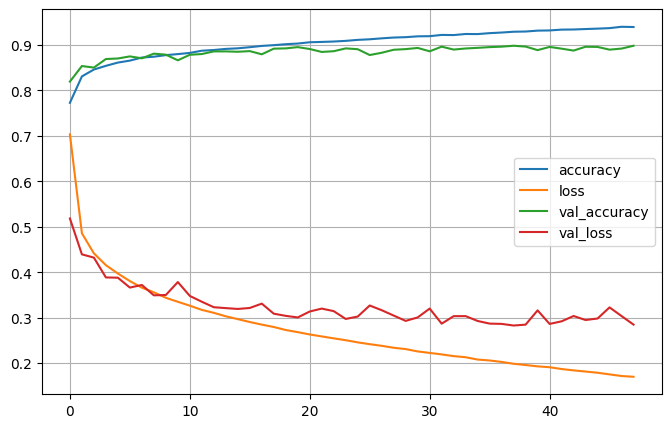

In [22]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)

In [23]:
model.evaluate(X_test/255,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8894 - loss: 0.3220


[0.31877994537353516, 0.8899000287055969]

In [24]:
model.save("my_keras_model.keras")

In [25]:
model = keras.models.load_model("my_keras_model.keras")

# Fine tuining neural network yperparameters

---
What does it mean to fine tune neural network Hyperparameters:
Fine-tuning neural network hyperparameters refers to the process of optimizing the parameters that control the training and architecture of a neural network to achieve better performance on a given task. Hyperparameters are not learned during training; instead, they are set prior to training and can significantly impact the model's accuracy, efficiency, and generalization.

Common Hyperparameters to Fine-Tune:

1.Learning Rate: Determines how much the weights are updated during training. A suitable learning rate ensures faster convergence without overshooting the optimal solution.


2.Batch Size: Specifies the number of samples processed before updating the model's parameters. Smaller batch sizes provide noisy updates, while larger ones offer stability but require more memory.


3.Number of Layers and Neurons: Defines the depth and width of the network, impacting its capacity to learn complex patterns.


4.Activation Functions: Controls how neurons output values, influencing non-linear learning capabilities.


5.Dropout Rate: Prevents overfitting by randomly ignoring certain neurons during training.


6.Optimizer: Algorithms like SGD, Adam, or RMSprop determine how weights are updated based on gradients.


7.Epochs: The number of complete passes through the training dataset.


Techniques for Fine-Tuning:

1.Grid Search: Tests combinations of hyperparameters systematically across a predefined range.


2.Random Search: Samples random combinations of hyperparameters within specified ranges.


3.Bayesian Optimization: Uses probabilistic models to predict promising hyperparameter configurations.


4.Manual Tuning: Adjusting hyperparameters based on domain knowledge and empirical results.


5.Fine-tuning is critical for achieving optimal model performance while balancing computational efficiency and generalization ability.

---

Inorder to use hyperparameter features from scikit-learn we need to wrap our keras model into object so that it can mimic regular scikit-learn regerssors.


The first step is to create a function that will build and compile a keras model, given its set of hyperparameters





In [26]:
def build_model(n_hidden = 1, n_neurons = 30, learning_rate = 0.003,input_shape = [28,28]):
  model = keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape= input_shape))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons,activation = "relu"))
  model.add(keras.layers.Dense(1))
  optimizer = keras.optimizers.SGD(learning_rate = learning_rate)
  model.compile(loss = "mse",optimizer = optimizer)
  return model

This is a simple model for univariate regression( only one output neuron).
Now we create a KerasRegressor() on this build_model() function

In [27]:
from scikeras.wrappers import KerasRegressor
keras_reg = KerasRegressor(build_model)

In [28]:
keras_reg.fit(X_train, y_train, epochs = 100,validation_data = (X_valid,y_valid),callbacks = [keras.callbacks.EarlyStopping(patience = 10)])

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100


2025-05-24 12:53:49.753290: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.2861 - val_loss: 1.8347
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.8582 - val_loss: 1.6515
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7016 - val_loss: 1.6208
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5958 - val_loss: 1.5745
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.5313 - val_loss: 1.6611
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.5003 - val_loss: 1.4625
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.4673 - val_loss: 1.4289
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.4588 - val_loss: 1.4238
Epoch 9/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.4091 - val_loss: 1.4264
Epoch 10/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.3716 - val_loss: 1.4590
Epoch 11/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.3633 - val_loss: 1.4015
Epoch 12/100
1719/1719 ━━━━━━━━

KerasRegressor(
	model=<function build_model at 0x7d2377f06700>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
)

In [29]:
mse_test = keras_reg.score(X_test/255,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [30]:
mse_test

0.8335518836975098

In [31]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [36]:
keras_reg.get_params().keys()

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs'])

In [37]:
# Update param_distribution keys to use 'model__' prefix
param_distribution_prefixed = {
	"model__n_hidden": [0, 1, 2, 3],
	"model__n_neurons": np.arange(1, 100),
	"model__learning_rate": reciprocal(3e-4, 3e-2)
}

rnd_search_cv = RandomizedSearchCV(
	estimator=keras_reg,
	param_distributions=param_distribution_prefixed,
	n_iter=10,
	cv=3,
	verbose=2
)
rnd_search_cv.fit(
	X_train, y_train,
	epochs=10,
	validation_data=(X_valid, y_valid),
	callbacks=[keras.callbacks.EarlyStopping(patience=5)]
)
best_params = rnd_search_cv.best_params_
best_score = rnd_search_cv.best_score_
print("Best parameters:", best_params)
print("Best score:", best_score)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10


2025-05-24 13:03:13.327858: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 114984576 exceeds 10% of free system memory.


1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.7110 - val_loss: 2.9788
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.9311 - val_loss: 2.6205
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.6334 - val_loss: 2.4680
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.4168 - val_loss: 2.2956
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.3147 - val_loss: 2.2072
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.2423 - val_loss: 2.1578
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.1843 - val_loss: 2.1310
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.1478 - val_loss: 2.0725
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.0441 - val_loss: 2.0385
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0947 - val_loss: 2.0332
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[CV] END model__learning_rate=0.0008964307779758178, model__n_hidden=0, model__n_neurons=

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10


2025-05-24 13:03:42.648683: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 114987712 exceeds 10% of free system memory.


1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4.9071 - val_loss: 2.9295
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.8279 - val_loss: 2.6161
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.6390 - val_loss: 2.4356
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.4221 - val_loss: 2.3105
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3125 - val_loss: 2.2182
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.2136 - val_loss: 2.1756
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1747 - val_loss: 2.1126
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.0771 - val_loss: 2.0729
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0596 - val_loss: 2.0482
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0424 - val_loss: 2.0265
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[CV] END model__learning_rate=0.0008964307779758178, model__n_hidden=0, model__n_neurons=

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-05-24 13:04:10.818153: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 114987712 exceeds 10% of free system memory.


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.9621 - val_loss: 2.9028
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.9062 - val_loss: 2.6008
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.6793 - val_loss: 2.4116
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.4622 - val_loss: 2.2889
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.3299 - val_loss: 2.2185
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.2341 - val_loss: 2.1440
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.1588 - val_loss: 2.0967
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.1026 - val_loss: 2.0599
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.0873 - val_loss: 2.0592
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0516 - val_loss: 2.0312
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[CV] END model__learning_rate=0.0008964307779758178, model__n_hidden=0, model_

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 5.1233 - val_loss: 2.7084
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.6529 - val_loss: 2.3088
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.3422 - val_loss: 2.1199
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.0688 - val_loss: 1.9621
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.0021 - val_loss: 1.8783
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.9060 - val_loss: 1.8257
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.8235 - val_loss: 1.7855
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.8055 - val_loss: 1.7483
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7678 - val_loss: 1.7263
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7553 - val_loss: 1.7450
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[CV] END model__learning_rate=0.0005432621591177808, model__n_hidden=1, model_

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 5.6510 - val_loss: 2.7515
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.6565 - val_loss: 2.3580
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.3519 - val_loss: 2.1447
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.1445 - val_loss: 2.0104
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.0139 - val_loss: 1.9303
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.9313 - val_loss: 1.8686
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.9217 - val_loss: 1.8310
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.8181 - val_loss: 1.8070
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.7519 - val_loss: 1.7708
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7633 - val_loss: 1.7416
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[CV] END model__learning_rate=0.0005432621591177808, model__n_hidden=1, model_

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4.9929 - val_loss: 2.6466
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.6041 - val_loss: 2.2664
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.3145 - val_loss: 2.1135
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.1011 - val_loss: 1.9492
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.0003 - val_loss: 1.8833
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.9124 - val_loss: 1.8332
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.8481 - val_loss: 1.8049
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.8360 - val_loss: 1.7951
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.8151 - val_loss: 1.7524
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7870 - val_loss: 1.7250
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[CV] END model__learning_rate=0.0005432621591177808, model__n_hidden=1, model_

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4.9612 - val_loss: 1.6756
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7223 - val_loss: 1.5083
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.5686 - val_loss: 1.4996
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.3932 - val_loss: 1.3426
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.3197 - val_loss: 1.3466
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.3307 - val_loss: 1.3610
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.2353 - val_loss: 1.3333
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.2164 - val_loss: 1.2798
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.1668 - val_loss: 1.2654
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.1286 - val_loss: 1.2535
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[CV] END model__learning_rate=0.024552263765862874, model__n_hidden=3, model__

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3.7820 - val_loss: 1.6577
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5998 - val_loss: 1.4379
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.4303 - val_loss: 1.3325
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.3201 - val_loss: 1.4017
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.2668 - val_loss: 1.2729
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.2538 - val_loss: 1.3433
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.1910 - val_loss: 1.2855
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.1710 - val_loss: 1.2666
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.1091 - val_loss: 1.3035
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.1169 - val_loss: 1.2868
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[CV] END model__learning_rate=0.024552263765862874, model__n_hidden=3, model__

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6.0220 - val_loss: 1.5918
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7057 - val_loss: 1.5305
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5598 - val_loss: 1.5090
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.4785 - val_loss: 1.4164
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.3792 - val_loss: 1.4039
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.3152 - val_loss: 1.3112
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.2434 - val_loss: 1.3018
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.2136 - val_loss: 1.9125
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.1906 - val_loss: 1.4408
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.2266 - val_loss: 1.2704
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[CV] END model__learning_rate=0.024552263765862874, model__n_hidden=3, model__

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step
[CV] END model__learning_rate=0.01852780484051431, model__n_hidden=0, model__n_neurons=82; total time=  20.6s


/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 455, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/scikeras/wrappers.py", line 1127, in score
    return self.scorer(y, y_pred, sample_weight=sample_weight, **score_args)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: nan - val_loss: nan
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan - val_loss: nan
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: nan - val_loss: nan
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 887us/step


/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 455, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/scikeras/wrappers.py", line 1127, in score
    return self.scorer(y, y_pred, sample_weight=sample_weight, **score_args)


[CV] END model__learning_rate=0.01852780484051431, model__n_hidden=0, model__n_neurons=82; total time=  26.1s
Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: nan - val_loss: nan
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan - val_loss: nan
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan - val_loss: nan
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan - val_loss: nan
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan - val_loss: nan
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan - val_loss: nan
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: nan - val_loss: nan
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 455, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/scikeras/wrappers.py", line 1127, in score
    return self.scorer(y, y_pred, sample_weight=sample_weight, **score_args)


[CV] END model__learning_rate=0.01852780484051431, model__n_hidden=0, model__n_neurons=82; total time=  31.2s
Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 17.8996 - val_loss: 8.2301
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 8.3030 - val_loss: 8.2290
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 8.2900 - val_loss: 8.2294
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 8.3265 - val_loss: 8.2290
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 8.3262 - val_loss: 8.2287
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 8.2170 - val_loss: 7.9050
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.0723 - val_loss: 2.6079
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.5974 - val_loss: 2.3386
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.4052 - val_loss: 2.2316
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.2684 - val_loss: 2.1341
573/573 

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 7.3641 - val_loss: 2.3708
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.3708 - val_loss: 2.1531
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.1746 - val_loss: 2.0594
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.0409 - val_loss: 1.9450
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.9403 - val_loss: 1.8809
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.8377 - val_loss: 1.8696
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.8475 - val_loss: 1.8365
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7631 - val_loss: 1.7892
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7464 - val_loss: 1.7635
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7699 - val_loss: 1.7554
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step
[CV] END model__learning_rate=0.000695398961820738, model__n_hidden=2, model

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.1719 - val_loss: 2.5035
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.5374 - val_loss: 2.2185
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.2316 - val_loss: 2.2350
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1678 - val_loss: 1.9847
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9838 - val_loss: 1.9307
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9378 - val_loss: 1.8457
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9078 - val_loss: 1.8493
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8679 - val_loss: 1.8123
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8569 - val_loss: 1.7844
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8086 - val_loss: 1.7755
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[CV] END model__learning_rate=0.000695398961820738, model__n_hidden=2, model__n_neurons=3

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5.5067 - val_loss: 2.1099
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0645 - val_loss: 1.8676
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.8611 - val_loss: 1.7895
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7586 - val_loss: 1.7234
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7275 - val_loss: 1.7377
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.6582 - val_loss: 1.6188
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5987 - val_loss: 1.5915
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5761 - val_loss: 1.6373
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.5429 - val_loss: 1.5461
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.5112 - val_loss: 1.5291
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[CV] END model__learning_rate=0.001055672744031813, model__n_hidden=3, model__

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5.3516 - val_loss: 2.1530
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0106 - val_loss: 2.0288
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8451 - val_loss: 1.7599
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7420 - val_loss: 1.6993
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.6564 - val_loss: 1.7383
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.5876 - val_loss: 1.6191
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.5312 - val_loss: 1.5323
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5074 - val_loss: 1.5147
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.4970 - val_loss: 1.6092
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.4372 - val_loss: 1.6362
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[CV] END model__learning_rate=0.001055672744031813, model__n_hidden=3, model__n_neurons=3

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 4.3902 - val_loss: 2.1186
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.0817 - val_loss: 1.8637
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.9021 - val_loss: 1.7616
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.7800 - val_loss: 1.6700
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.6641 - val_loss: 1.6099
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.5946 - val_loss: 1.6230
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5628 - val_loss: 1.5407
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.5295 - val_loss: 1.5231
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.5091 - val_loss: 1.4888
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.4667 - val_loss: 1.4906
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[CV] END model__learning_rate=0.001055672744031813, model__n_hidden=3, model__

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3.6258 - val_loss: 1.6404
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.6613 - val_loss: 1.5556
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5060 - val_loss: 1.4247
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.3781 - val_loss: 1.3369
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.3396 - val_loss: 1.2887
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.2460 - val_loss: 1.6326
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.2307 - val_loss: 1.2530
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.1892 - val_loss: 1.2166
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.0998 - val_loss: 1.2416
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.1046 - val_loss: 1.2461
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[CV] END model__learning_rate=0.008567615858822257, model__n_hidden=3, model__

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3.3022 - val_loss: 1.7851
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.6144 - val_loss: 1.5181
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.4826 - val_loss: 1.5543
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.3724 - val_loss: 1.3412
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.2933 - val_loss: 1.3437
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.2407 - val_loss: 1.2355
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.1953 - val_loss: 1.3091
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.1488 - val_loss: 1.2068
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.1425 - val_loss: 1.1900
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.0452 - val_loss: 1.2642
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[CV] END model__learning_rate=0.008567615858822257, model__n_hidden=3, model__

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 3.3387 - val_loss: 1.5606
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.6795 - val_loss: 1.5006
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5168 - val_loss: 1.3741
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.3797 - val_loss: 1.3329
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.3257 - val_loss: 1.2613
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.2732 - val_loss: 1.2855
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.2062 - val_loss: 1.2542
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.1693 - val_loss: 1.3472
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.1537 - val_loss: 1.3819
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.0742 - val_loss: 1.2085
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[CV] END model__learning_rate=0.008567615858822257, model__n_hidden=3, model__

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.8622 - val_loss: 1.9371
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9448 - val_loss: 1.8536
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7665 - val_loss: 1.6858
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.6255 - val_loss: 1.6039
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5709 - val_loss: 1.7495
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5092 - val_loss: 1.5175
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.4815 - val_loss: 1.4927
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.4641 - val_loss: 1.4507
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.3967 - val_loss: 1.4597
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.3656 - val_loss: 1.4417
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[CV] END model__learning_rate=0.001760917126825205, model__n_hidden=2, model__

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.8332 - val_loss: 2.0726
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9789 - val_loss: 1.7651
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7306 - val_loss: 1.6757
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.6812 - val_loss: 1.7039
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.6065 - val_loss: 1.5750
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5067 - val_loss: 1.6694
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5141 - val_loss: 1.4836
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.4530 - val_loss: 1.4724
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.4274 - val_loss: 1.4949
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.4272 - val_loss: 1.4252
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[CV] END model__learning_rate=0.001760917126825205, model__n_hidden=2, model__

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 3.6510 - val_loss: 1.9535
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.9750 - val_loss: 1.7954
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7926 - val_loss: 1.6911
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.6552 - val_loss: 1.5892
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.5964 - val_loss: 1.7326
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5909 - val_loss: 1.6332
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5100 - val_loss: 1.5011
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.4362 - val_loss: 1.4723
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.4371 - val_loss: 1.4725
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.3919 - val_loss: 1.4579
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[CV] END model__learning_rate=0.001760917126825205, model__n_hidden=2, model__

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: nan - val_loss: nan
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step
[CV] END model__learning_rate=0.01749158158537172, model__n_hidden=0, model__n_neurons=91; total time=  23.6s


/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 455, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/scikeras/wrappers.py", line 1127, in score
    return self.scorer(y, y_pred, sample_weight=sample_weight, **score_args)


Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: nan - val_loss: nan
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan - val_loss: nan
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan - val_loss: nan
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: nan - val_loss: nan
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: nan - val_loss: nan
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step


/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 455, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/scikeras/wrappers.py", line 1127, in score
    return self.scorer(y, y_pred, sample_weight=sample_weight, **score_args)


[CV] END model__learning_rate=0.01749158158537172, model__n_hidden=0, model__n_neurons=91; total time=  26.2s
Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: nan - val_loss: nan
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan - val_loss: nan
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: nan - val_loss: nan
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan - val_loss: nan
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: nan - val_loss: nan
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan - val_loss: nan
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan - val_loss: nan
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan - val_loss: nan
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan - val_loss: nan
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan - val_loss: nan
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 455, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/scikeras/wrappers.py", line 1127, in score
    return self.scorer(y, y_pred, sample_weight=sample_weight, **score_args)


[CV] END model__learning_rate=0.01749158158537172, model__n_hidden=0, model__n_neurons=91; total time=  33.0s
Epoch 1/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.9001 - val_loss: 2.9429
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.9203 - val_loss: 2.6305
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.6122 - val_loss: 2.4465
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.4639 - val_loss: 2.3256
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3328 - val_loss: 2.2302
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.2583 - val_loss: 2.1699
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1837 - val_loss: 2.1125
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0825 - val_loss: 2.0815
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1071 - val_loss: 2.0464
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0763 - val_loss: 2.0309
573/573 ━

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.7191 - val_loss: 2.9464
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.9083 - val_loss: 2.6435
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.6132 - val_loss: 2.4536
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.4724 - val_loss: 2.3322
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3486 - val_loss: 2.2388
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.2598 - val_loss: 2.2219
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1666 - val_loss: 2.1229
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1300 - val_loss: 2.0823
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0354 - val_loss: 2.0567
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0679 - val_loss: 2.0318
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step
[CV] END model__learning_rate=0.0008491074147640596, model__n_hidden=0, model__n_neuron

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.6708 - val_loss: 2.9358
Epoch 2/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.9011 - val_loss: 2.6249
Epoch 3/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.6199 - val_loss: 2.4618
Epoch 4/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.4679 - val_loss: 2.3109
Epoch 5/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3779 - val_loss: 2.2292
Epoch 6/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.2467 - val_loss: 2.1625
Epoch 7/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1993 - val_loss: 2.1110
Epoch 8/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.1316 - val_loss: 2.0701
Epoch 9/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.1317 - val_loss: 2.0450
Epoch 10/10
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.0866 - val_loss: 2.0348
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step
[CV] END model__learning_rate=0.0008491074147640596, model__n_hidden=0, model__n_neuron

/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.75000443 0.78590498 0.84630426        nan 0.76605769 0.81096594
 0.84888643 0.8236028         nan 0.74947904]
  warnings.warn(
/home/soulking/Documents/Machine learning codes/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 3.1139 - val_loss: 1.5966
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.5228 - val_loss: 1.4095
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.3664 - val_loss: 1.3321
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.2686 - val_loss: 1.2457
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.2305 - val_loss: 1.2489
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.1899 - val_loss: 1.2282
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.1030 - val_loss: 1.2135
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.0926 - val_loss: 1.2002
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.0631 - val_loss: 1.1747
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.0268 - val_loss: 1.1347
Best parameters: {'model__learning_rate': np.float64(0.008567615858822257), 'model__n_hidden': 3, 'model__n_neurons': n

Few libraries for optimizing hyperparameters:

 Hyperopt:

 A popular library for optimizing over all sorts of complex search spaces (includ
ing real values, such as the learning rate, and discrete values, such as the number
 of layers).

 Hyperas, kopt, or Talos:

 Useful libraries for optimizing hyperparameters for Keras models (the first two
 are based on Hyperopt).

 Keras Tuner:
 An easy-to-use hyperparameter optimization library by Google for Keras models,
 with a hosted service for visualization and analysis.

 Scikit-Optimize (skopt):
 A general-purpose optimization library. The BayesSearchCV class performs
 Bayesian optimization using an interface similar to GridSearchCV.

 Spearmint:
 A Bayesian optimization library.

 Hyperband:
 A fast hyperparameter tuning library based on the recent Hyperband paper22 by
 Lisha Li et al.

 Sklearn-Deap:
 A hyperparameter optimization library based on evolutionary algorithms, with a
 GridSearchCV-like interface

 The core idea of of these liberaries are: When a region of space turns out to be good, it should be explored more.